In [1]:
import matplotlib.pyplot as plt
import cv2
import pytesseract

In [2]:
# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
# Read image from which text needs to be extracted
img = cv2.imread("2022-08-17 (4).png")

In [4]:
# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [5]:

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (90, 90))

In [6]:
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [7]:
# Creating a copy of image
im2 = img.copy()



In [8]:
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
          
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
    
    # Open the file in append mode
    file = open("recognized10.txt", "a+")
    
    # Appending the text into file
    file.write(text)
    file.write("\n")
    
    # Close the file
    file.close

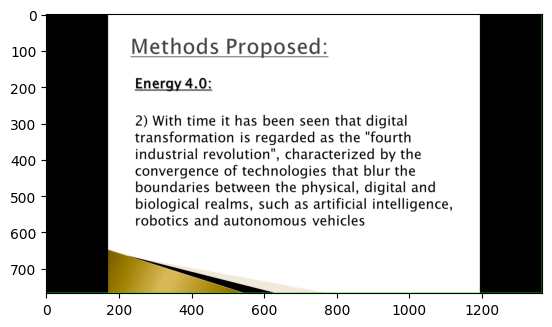

In [9]:
plt. imshow(gray)
#plt.imshow(rect)
plt. imshow(cropped)

In [10]:
print(text)

Methods Proposed:

Energy 4.0:

2) With time it has been seen that digital
transformation is regarded as the "fourth
industrial revolution", characterized by the
convergence of technologies that blur the
boundaries between the physical, digital and
biological realms, such as artificial intelligence,
robotics and autonomous vehicles


